In [1]:
import utils
import numpy as np
from deepchem import deepchem as dc
from deepchem.models import AttentiveFPModel

Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_sparse'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. cannot import name 'DMPNN' from 'deepchem.models.torch_models' (c:\Users\xsj110\AppData\Local\Programs\Python\Python38\lib\site-packages\deepchem\models\torch_models\__init__.py)
Skipped loading some Jax models, missing a dependency. No module named 'jaxlib'


In [2]:
utils.set_seed(50, tensorflow=False, pytorch=True)

In [3]:
data = utils.load_data('10K.csv', 10000, False)

In [4]:
data

,Unnamed: 0,i_i_glide_lignum,r_i_docking_score,SMILES,molecules,MolWt
0,0,13477,-13.126800,C[C@@H](NC(=O)N1C[C@H](c2ccccc2)[C@H]2COCC[C@H...,<rdkit.Chem.rdchem.Mol object at 0x000002A29F1...,448.567
1,1,516,-12.662900,O=C(Nc1cccc(C(=O)N2CCC(c3c[nH]c4ncccc34)CC2)c1...,<rdkit.Chem.rdchem.Mol object at 0x000002A29F1...,466.541
2,2,9425,-12.487000,Cc1nn(-c2ccccc2)c2nc(C(=O)N3CCC([C@H]4C(=O)Nc5...,<rdkit.Chem.rdchem.Mol object at 0x000002A29F1...,451.530
3,3,14512,-12.483500,Cc1cc(C)cc(C(=O)N2CCC[C@H](C(=O)NCc3cccc([C@@]...,<rdkit.Chem.rdchem.Mol object at 0x000002A29F1...,462.550
4,4,9615,-12.478500,CS(=O)(=O)c1ccc(F)c(C(=O)Nc2ccc(-c3nc(-c4ccccc...,<rdkit.Chem.rdchem.Mol object at 0x000002A29F1...,436.468
...,...,...,...,...,...,...
9893,9893,2451,-0.560302,O=C([O-])C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x000002A29F0...,113.014
9894,9894,7813,-0.384887,Cc1cnn(C)c1S(=O)(=O)NC[C@@H](Cc1ccccn1)C(=O)[O-],<rdkit.Chem.rdchem.Mol object at 0x000002A29F0...,337.381
9895,9895,11442,-0.269109,Cn1cccc(C(=O)N2CCN(C3CC3)c3ccc(Cl)cc32)c1=O,<rdkit.Chem.rdchem.Mol object at 0x000002A29F0...,343.814
9896,9896,13971,-0.150473,O=C([O-])[C@H]1CC[C@@H](C(=O)N2CCCc3ccccc32)CC1,<rdkit.Chem.rdchem.Mol object at 0x000002A29F0...,286.351


In [6]:
featurizer = dc.feat.MolGraphConvFeaturizer(use_edges=True)
train_data, valid_data, test_data, transformer = utils.receptor_data(data, 'r_i_docking_score', featurizer)

In [8]:
metric = dc.metrics.Metric(dc.metrics.r2_score)

model = AttentiveFPModel(
    n_tasks=1,
    mode='regression',
)

train_model = utils.fit_best_model(
    model,
    train_data,
    valid_data,
    [metric],
    [transformer],
    patience=10,
    high_is_better=True,
    model_name="AttentiveFPModel"
)

Epoch 1/100
{'r2_score': 0.5287585744238201}
Epoch 2/100
{'r2_score': 0.3916746792355521}
Epoch 3/100
{'r2_score': 0.5882962751008084}
Epoch 4/100
{'r2_score': 0.5383538901677143}
Epoch 5/100
{'r2_score': 0.6133655950821684}
Epoch 6/100
{'r2_score': 0.4166774473386592}
Epoch 7/100
{'r2_score': 0.6284076123443542}
Epoch 8/100
{'r2_score': 0.649854292552285}
Epoch 9/100


Exception ignored in: <function Model.__del__ at 0x000002A29020CCA0>
Traceback (most recent call last):
  File "c:\Users\xsj110\AppData\Local\Programs\Python\Python38\lib\site-packages\deepchem\models\models.py", line 60, in __del__
    shutil.rmtree(self.model_dir)
  File "c:\Users\xsj110\AppData\Local\Programs\Python\Python38\lib\shutil.py", line 740, in rmtree
    return _rmtree_unsafe(path, onerror)
  File "c:\Users\xsj110\AppData\Local\Programs\Python\Python38\lib\shutil.py", line 599, in _rmtree_unsafe
    onerror(os.scandir, path, sys.exc_info())
  File "c:\Users\xsj110\AppData\Local\Programs\Python\Python38\lib\shutil.py", line 596, in _rmtree_unsafe
    with os.scandir(path) as scandir_it:
FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\xsj110\\AppData\\Local\\Temp\\tmpqhty9pzu'


{'r2_score': 0.6387726615101168}
Epoch 10/100
{'r2_score': 0.6396231980872742}
Epoch 11/100
{'r2_score': 0.6207487010867994}
Epoch 12/100
{'r2_score': 0.6542425002333595}
Epoch 13/100
{'r2_score': 0.6500296555999019}
Epoch 14/100
{'r2_score': 0.6673838756961261}
Epoch 15/100
{'r2_score': 0.6556162357615919}
Epoch 16/100
{'r2_score': 0.6645154230473864}
Epoch 17/100
{'r2_score': 0.6546693193261767}
Epoch 18/100
{'r2_score': 0.6758305005234206}
Epoch 19/100
{'r2_score': 0.6651053407633771}
Epoch 20/100
{'r2_score': 0.6707525859687793}
Epoch 21/100
{'r2_score': 0.6667288672311729}
Epoch 22/100
{'r2_score': 0.6629449900473583}
Epoch 23/100
{'r2_score': 0.6639730774046531}
Epoch 24/100
{'r2_score': 0.5808615624901567}
Epoch 25/100
{'r2_score': 0.6793733367000256}
Epoch 26/100
{'r2_score': 0.6685405351923148}
Epoch 27/100
{'r2_score': 0.6814508878112211}
Epoch 28/100
{'r2_score': 0.6656886741465486}
Epoch 29/100
{'r2_score': 0.6808545485543784}
Epoch 30/100
{'r2_score': 0.6703525980677598}
E

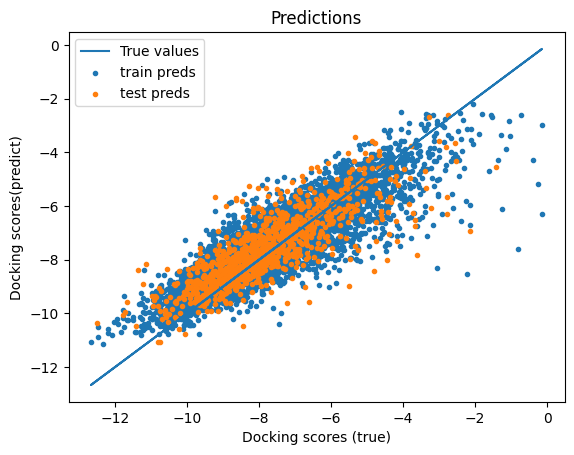

In [9]:
utils.plot_predictions(model, train_data, test_data, transformer)

In [10]:
utils.eval(model, valid_data, [transformer])

RMSE   | 0.915
R2     | 0.654
MAE    | 0.681
mean   | -7.589
std    | 1.347


In [11]:
R2 = dc.metrics.Metric(dc.metrics.r2_score)
model.evaluate(valid_data, [R2], [transformer])

{'r2_score': 0.6536680991618475}

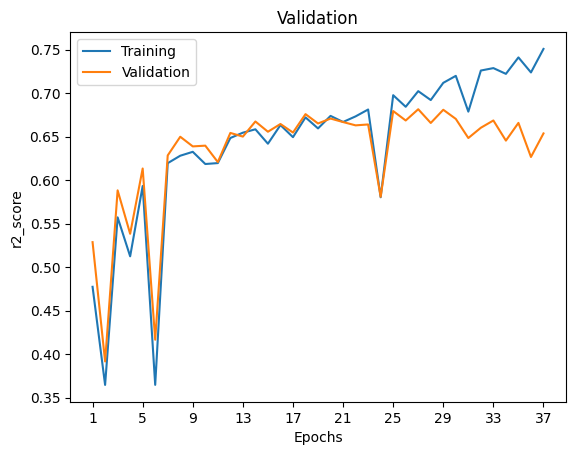

In [12]:
utils.plot_validation(train_model, metric)

In [13]:
# Remember when loading an old model one must also load the data.
# Featurizing the data is not strictly nessecary, but the current utility functions works
# with DeepChems NumpyDatasets so it is more easy to just redo the dataprocessing as usual.
data = utils.load_data('ABC_smiles_data.csv', 600, True)
featurizer = dc.feat.MolGraphConvFeaturizer(use_edges=True)
train_data, valid_data, test_data, transformer = utils.receptor_data(data, 'BCRP', featurizer)

model02 = AttentiveFPModel(
    n_tasks=1,
    mode='regression',
)

model02.restore(model_dir='models/model02.ckpt/')

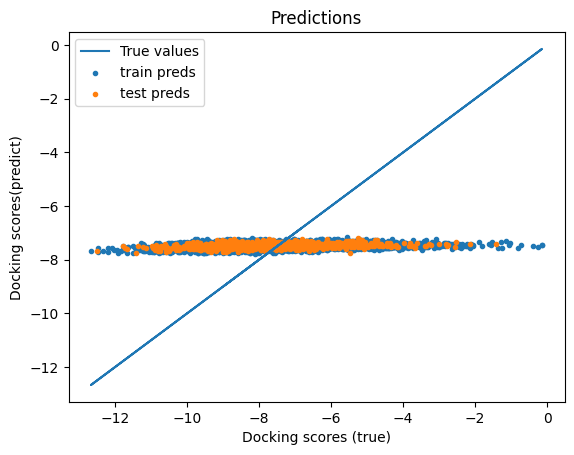

In [14]:

utils.plot_predictions(model02, train_data, test_data, transformer)